AUTISMO Y Autism Spectrum Disorder (ASD) o Trastorno del Espectro Autista (TEA)
El autismo es un trastorno del neurodesarrollo que se caracteriza por un deterioro de la interacción social, la comunicación verbal y no verbal, y un comportamiento restringido y repetitivo. El autismo afecta al procesamiento de la información en el cerebro al alterar la forma en que las células nerviosas y sus sinapsis se conectan y organizan; no se comprende bien cómo ocurre esto. El autismo tiene una fuerte base genética, aunque la genética del autismo es compleja y no está claro si el TEA se explica más por mutaciones raras o por combinaciones raras de variantes genéticas comunes. 

El autismo es un trastorno del espectro autista (TEA). Junto con otros cuatro (el síndrome de Asperger, el trastorno generalizado del desarrollo, el síndrome de Rhett y el trastorno desintegrativo infantil) son sólo partes variables del autismo, siendo el autismo real la forma más dura.


In [369]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import nbformat as nbf

sns.set_style("darkgrid")
pd.set_option("display.max_columns", None) 
pd.options.plotting.backend = "plotly"

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [370]:
df = pd.read_csv("C:/Users/gdlcm/Downloads/autism_screening.csv")
df.head(10)


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,24.0,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,27.0,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35.0,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,40.0,f,?,no,no,Egypt,no,2.0,18 and more,?,NO
5,1,1,1,1,1,0,1,1,1,1,36.0,m,Others,yes,no,United States,no,9.0,18 and more,Self,YES
6,0,1,0,0,0,0,0,1,0,0,17.0,f,Black,no,no,United States,no,2.0,18 and more,Self,NO
7,1,1,1,1,0,0,0,0,1,0,64.0,m,White-European,no,no,New Zealand,no,5.0,18 and more,Parent,NO
8,1,1,0,0,1,0,0,1,1,1,29.0,m,White-European,no,no,United States,no,6.0,18 and more,Self,NO
9,1,1,1,1,0,1,1,1,1,0,17.0,m,Asian,yes,yes,Bahamas,no,8.0,18 and more,Health care professional,YES


In [371]:
df.shape

(704, 21)

In [372]:
pd.DataFrame(df.dtypes, columns = [""])

,
A1_Score,int64
A2_Score,int64
A3_Score,int64
A4_Score,int64
A5_Score,int64
A6_Score,int64
A7_Score,int64
A8_Score,int64
A9_Score,int64
A10_Score,int64


In [373]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,702.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,29.698006,4.875000
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,16.507465,2.501493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


In [374]:
pd.DataFrame(df.isnull().sum(), columns = [""])

,
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0
A10_Score,0


In [375]:
print(df['age'].max())

print(df['age'].min())

383.0
17.0


In [376]:
df[df['age'] == df['age'].max()]

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
52,1,0,0,0,0,0,0,0,0,0,383.0,f,Pasifika,no,no,New Zealand,no,1.0,18 and more,Self,NO


In [377]:
df.drop(index = 52, inplace = True)

df.reset_index(inplace = True)

In [378]:
df['age'] = df['age'].fillna(np.round(df['age'].mean(), 0))

In [379]:
pd.DataFrame(df.isnull().sum(), columns=["Missing Values"])

,Missing Values
index,0
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0


In [380]:
for col in df.select_dtypes('O').columns:
    print("-------------------------------")
    print(f'Column name: {col}\n')
    print(f'Unique values:\n{df[col].unique()}\n\n')

-------------------------------
Column name: gender

Unique values:
['f' 'm']


-------------------------------
Column name: ethnicity

Unique values:
['White-European' 'Latino' '?' 'Others' 'Black' 'Asian' 'Middle Eastern '
 'Pasifika' 'South Asian' 'Hispanic' 'Turkish' 'others']


-------------------------------
Column name: jundice

Unique values:
['no' 'yes']


-------------------------------
Column name: austim

Unique values:
['no' 'yes']


-------------------------------
Column name: contry_of_res

Unique values:
['United States' 'Brazil' 'Spain' 'Egypt' 'New Zealand' 'Bahamas'
 'Burundi' 'Austria' 'Argentina' 'Jordan' 'Ireland' 'United Arab Emirates'
 'Afghanistan' 'Lebanon' 'United Kingdom' 'South Africa' 'Italy'
 'Pakistan' 'Bangladesh' 'Chile' 'France' 'China' 'Australia' 'Canada'
 'Saudi Arabia' 'Netherlands' 'Romania' 'Sweden' 'Tonga' 'Oman' 'India'
 'Philippines' 'Sri Lanka' 'Sierra Leone' 'Ethiopia' 'Viet Nam' 'Iran'
 'Costa Rica' 'Germany' 'Mexico' 'Russia' 'Armenia' 'I

In [381]:
df['ethnicity'] = df['ethnicity'].replace('?', 'Others')

In [382]:
df['ethnicity'] = df['ethnicity'].replace('others', 'Others')

In [383]:
df['ethnicity'].unique()

array(['White-European', 'Latino', 'Others', 'Black', 'Asian',
       'Middle Eastern ', 'Pasifika', 'South Asian', 'Hispanic',
       'Turkish'], dtype=object)

In [384]:
df['relation'] = df['relation'].replace('?', df['relation'].mode()[0])

In [385]:
df['relation'].unique()

array(['Self', 'Parent', 'Health care professional', 'Relative', 'Others'],
      dtype=object)

In [386]:
df.drop(['index','age_desc'], axis = 1, inplace = True)

In [387]:
df.drop(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score'], axis= 1, inplace = True)
df.drop(['jundice'], axis= 1, inplace = True)
df.drop(['used_app_before'], axis= 1, inplace = True)
df.drop(['relation'], axis= 1, inplace = True)

In [388]:
df.head(10)

,age,gender,ethnicity,austim,contry_of_res,result,Class/ASD
0,26.0,f,White-European,no,United States,6.0,NO
1,24.0,m,Latino,yes,Brazil,5.0,NO
2,27.0,m,Latino,yes,Spain,8.0,YES
3,35.0,f,White-European,yes,United States,6.0,NO
4,40.0,f,Others,no,Egypt,2.0,NO
5,36.0,m,Others,no,United States,9.0,YES
6,17.0,f,Black,no,United States,2.0,NO
7,64.0,m,White-European,no,New Zealand,5.0,NO
8,29.0,m,White-European,no,United States,6.0,NO
9,17.0,m,Asian,yes,Bahamas,8.0,YES


In [389]:
fig = px.histogram(df, x = "gender",
                  template='plotly_dark', color_discrete_sequence = ["orange"],
                  title = "<b>Counts of Male and Female</b>")
fig.update_layout(title_x = 0.5,
                  title_font = dict(size = 20),
                  uniformtext_minsize = 15)
fig.show()


In [390]:
fig = px.pie(df, names = "gender",
             title = "<b>Counts of Male and Female</b>",
             hole = 0.5, template = "plotly_dark")

fig.update_traces(textposition='inside',
                  textinfo='percent+label',
                  marker=dict(line=dict(color='#000000', width = 1.5)))

fig.update_layout(title_x = 0.5,
                  title_font = dict(size = 20),
                  uniformtext_minsize = 15)


fig.show()

In [391]:
df['Class/ASD'].value_counts()

NO     514
YES    189
Name: Class/ASD, dtype: int64

In [392]:
fig = px.pie(df, names = "Class/ASD",
             title = "<b>Autism Spectrum Disorder Counts</b>",
             template = "plotly_dark")

fig.update_traces(textposition='inside',
                  textinfo = 'percent+label',
                  marker = dict(line = dict(color = '#000000', width = 1.5)))

fig.update_layout(title_x = 0.5,
                  title_font = dict(size = 20),
                  uniformtext_minsize = 15)


fig.show()

In [393]:
fig = df.groupby('gender').agg({'age':'mean'}).plot(kind='bar',                                                 
                                                    template = "plotly_dark", color_discrete_sequence = ["orange"],
                                                    labels = {"gender":"Gender",
                                                              "value":"Age"},
                                                    title = "<b>Average Age by Gender</b>");

fig.update_layout(title_x = 0.5,
                  title_font = dict(size = 20),
                  uniformtext_minsize = 15)


fig.show()

In [394]:
fig = df[df['Class/ASD'] == "YES"]['gender'].value_counts().plot(kind = 'bar',                                                               
                                                                 template = "seaborn",
                                                                 color_discrete_sequence = ["#84b1b5"],
                                                                 labels = {"index":"Gender",
                                                                          "value":"Counts"});

fig.update_layout(title = "<b>Gender Count of ASD Patients</b>\n",
                  title_font = dict(size = 20), width = 900)

fig.show()

In [395]:
asd_patients_country_wise = pd.DataFrame(df[df['Class/ASD'] == "YES"]['contry_of_res'].value_counts()).rename({"contry_of_res":"ASD_Patient_Counts"}, axis = 1)

In [396]:
asd_patients_country_wise.style.bar(color="#84A9AC") 

,ASD_Patient_Counts
United States,53
United Kingdom,29
New Zealand,15
Australia,12
Canada,10
India,6
France,5
Brazil,5
Malaysia,4
Mexico,4


In [397]:
asd_patients_country_wise.index

Index(['United States', 'United Kingdom', 'New Zealand', 'Australia', 'Canada',
       'India', 'France', 'Brazil', 'Malaysia', 'Mexico', 'Italy',
       'Netherlands', 'Austria', 'Russia', 'United Arab Emirates', 'Sweden',
       'Afghanistan', 'Germany', 'Ireland', 'South Africa', 'Jordan', 'Spain',
       'Uruguay', 'Nepal', 'Finland', 'AmericanSamoa', 'Pakistan', 'Belgium',
       'Viet Nam', 'Argentina', 'Saudi Arabia', 'Bangladesh', 'Romania',
       'Sierra Leone', 'China', 'Bahamas', 'Cyprus'],
      dtype='object')

In [398]:
fig = px.bar(data_frame = asd_patients_country_wise, 
             x = asd_patients_country_wise.index,    
             y = "ASD_Patient_Counts",
             labels = {"index" : "Country"},     
             color_discrete_sequence = px.colors.qualitative.D3_r,
             template='plotly_dark')

fig.update_xaxes(tickangle = 310)

fig.update_layout(title={
        'text': "<b>Counts of ASD Patients Country Wise</b>",
        'y':0.93,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()


In [399]:
label = asd_patients_country_wise.index
value = asd_patients_country_wise['ASD_Patient_Counts']

fig = go.Figure(data=[go.Pie(labels = label,
                             values = value,
                             rotation = 90)])

fig.update_traces(textposition = 'inside',
                  textinfo = 'percent+label',
                  marker = dict(line = dict(color = '#000000', width = 1)))

fig.update_layout(title_text='<b>Country Wise Counts of ASD Patients</b>',
                  title_x = 0.5,
                  title_font = dict(size = 20),
                  uniformtext_minsize = 15,
                  template='plotly_dark')

fig.show()

In [400]:
df.head(10)

,age,gender,ethnicity,austim,contry_of_res,result,Class/ASD
0,26.0,f,White-European,no,United States,6.0,NO
1,24.0,m,Latino,yes,Brazil,5.0,NO
2,27.0,m,Latino,yes,Spain,8.0,YES
3,35.0,f,White-European,yes,United States,6.0,NO
4,40.0,f,Others,no,Egypt,2.0,NO
5,36.0,m,Others,no,United States,9.0,YES
6,17.0,f,Black,no,United States,2.0,NO
7,64.0,m,White-European,no,New Zealand,5.0,NO
8,29.0,m,White-European,no,United States,6.0,NO
9,17.0,m,Asian,yes,Bahamas,8.0,YES


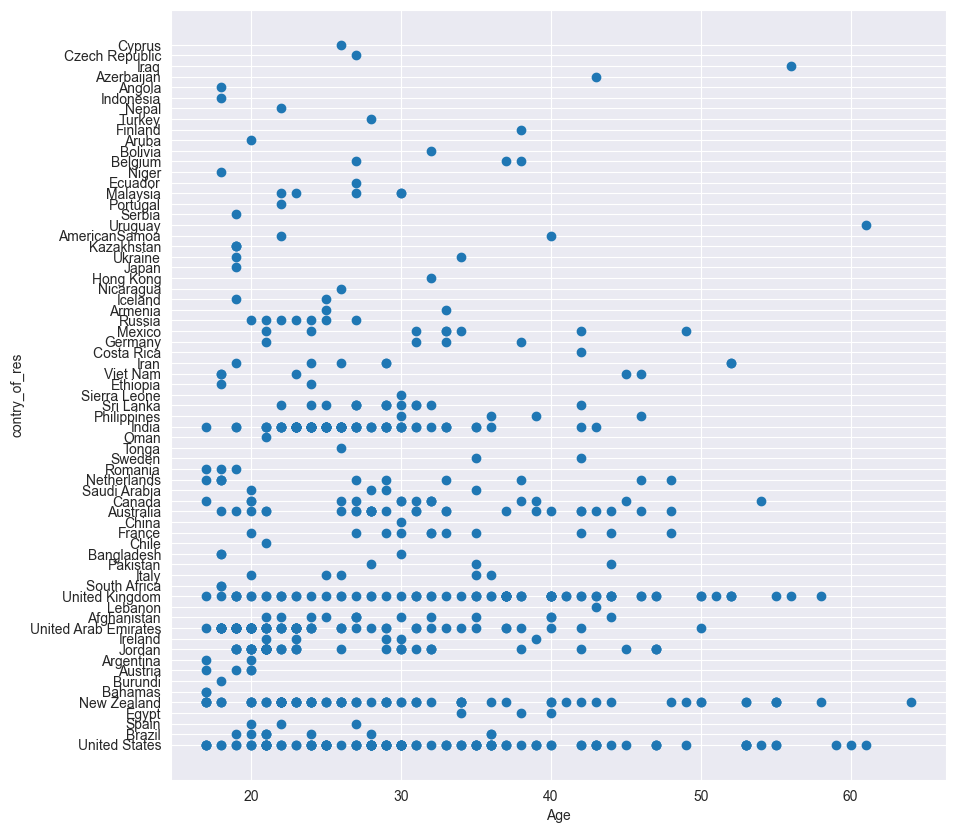

In [401]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(df['age'], df['contry_of_res'])
ax.set_xlabel('Age')
ax.set_ylabel('contry_of_res')
plt.show()

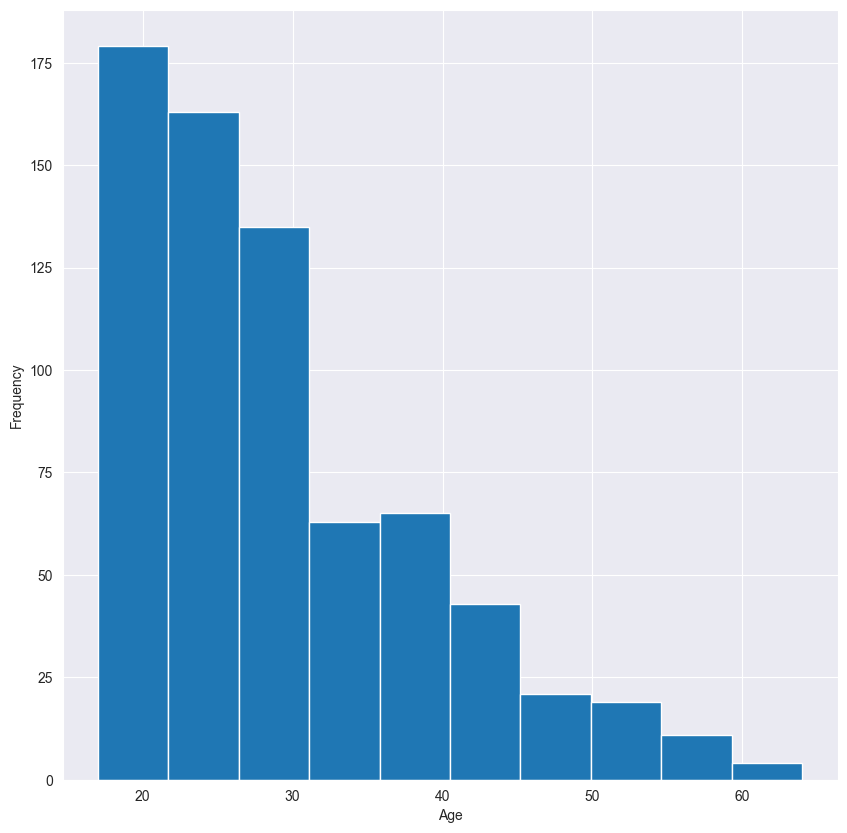

In [402]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.hist(df['age'])
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
plt.show()


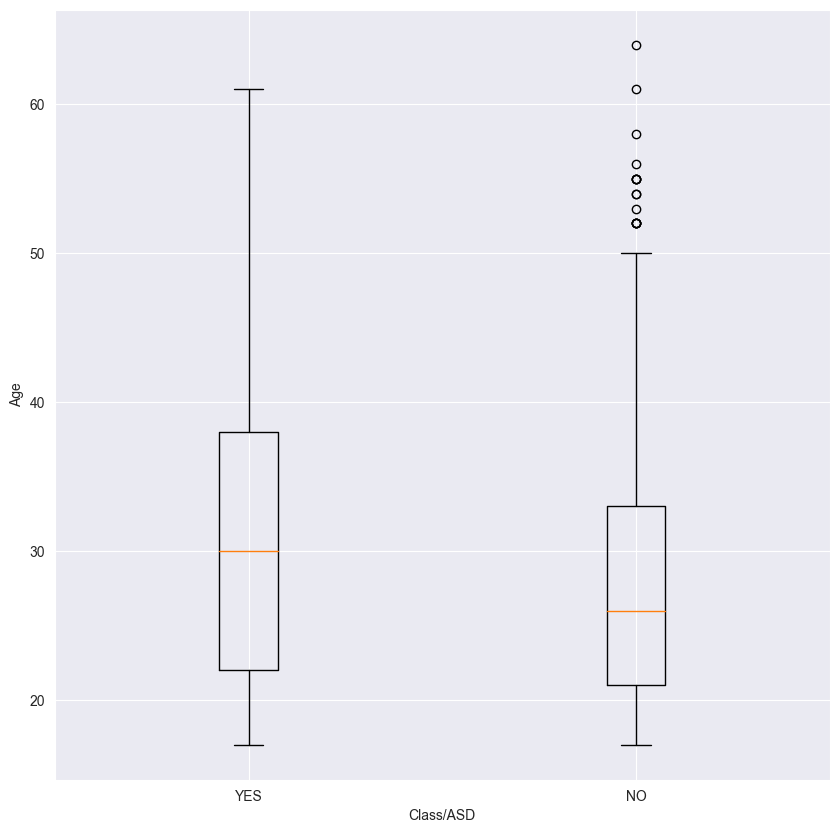

In [403]:
# create a boxplot of the age variable grouped by the Class/ASD variable 
fig, ax = plt.subplots(figsize=(10, 10))
ax.boxplot([df[df['Class/ASD'] == 'YES']['age'], df[df['Class/ASD'] == 'NO']['age']])
ax.set_xticklabels(['YES', 'NO'])
ax.set_xlabel('Class/ASD')
ax.set_ylabel('Age')
plt.show()

In [404]:
df.to_csv("C:/Users/gdlcm/Downloads/Updated_autism_screening.csv")


df.to_excel("C:/Users/gdlcm/Downloads/Updated_autism_screening.xlsx")